### Base de Dados

**Descriçao de Atributos**

- age: idade
- workclass: classe de trabalho
- education: nível educacional
- education-num: anos de educação
- marital-status: estado civil
- occupation: profissão
- race: etnia
- sex: gênero
- capital-gain: ganho de capital
- capital-loss: perda de capital
- hours-per-week: horas de trabalho por semana
- native-country: país de origem

**Contexto dos Dados**

O dataset apresenta dados de um problema de classificação, nessa atividade vamos realizar análise descritiva e tratamento dos dados, utilizar técnicas de amostragem, modelar dos dados e aplicar a redução de dimensionalidade.

## Atividade

In [ ]:
import pandas as pd

**Dados**

In [ ]:
# Carregue o dataset fornecido ('adult_final.csv')
df = pd.read_csv('/content/adult_final.csv')

In [ ]:
df.sample(3)

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
27329,29,Private,Masters,14,Married-civ-spouse,Prof-specialty,Asian-Pac-Islander,Female,0,0,40,Hong,>50K
22356,19,Private,Some-college,10,Never-married,Other-service,White,Female,0,0,27,United-States,<=50K
30111,41,Federal-gov,Prof-school,15,Married-civ-spouse,Prof-specialty,White,Male,0,0,50,India,>50K


**1. Apresente o tipo das variáveis.**


*   age: idade = Variável numérica contínua
*   workclass: classe de trabalho = Variável categórica nominal

*   education: nível educacional = Variável categórica ordinal

*   education-num: anos de educação = Variável numérica discreta

*   marital-status: estado civil = Variável categórica nominal
*   occupation: profissão = Variável categórica nominal


*   race: etnia = Variável categórica nominal


*   sex: gênero = Variável categórica nominal

*   capital-gain: ganho de capital = Variável numérica contínua

*   capital-loss: perda de capital = Variável numérica contínua
*   hours-per-week: horas de trabalho por semana = Variável numérica contínua


*   native-country: país de origem = Variável categórica nominal





In [ ]:
df.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

**2.Apresente de forma gráfica e numérica a análise exploratória das variáveis _education_ e _race_.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

###Education

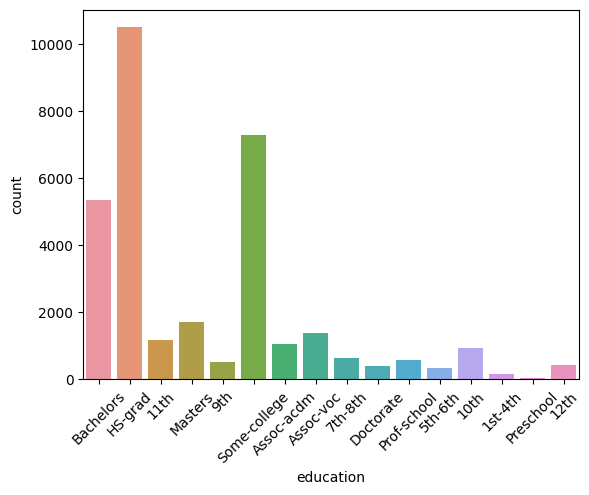

In [ ]:
sns.countplot(x='education', data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
edu_counts = df['education'].value_counts()
edu_percentages = edu_counts / edu_counts.sum() * 100
edu_stats = pd.concat([edu_counts, edu_percentages], axis=1, keys=['Quantidade', 'Porcentagem'])
print(edu_stats)

              Quantidade  Porcentagem
HS-grad            10501    32.250238
Some-college        7291    22.391818
Bachelors           5355    16.446055
Masters             1723     5.291607
Assoc-voc           1382     4.244341
11th                1175     3.608612
Assoc-acdm          1067     3.276926
10th                 933     2.865391
7th-8th              646     1.983969
Prof-school          576     1.768987
9th                  514     1.578576
12th                 433     1.329812
Doctorate            413     1.268389
5th-6th              333     1.022696
1st-4th              168     0.515955
Preschool             51     0.156629


###Race

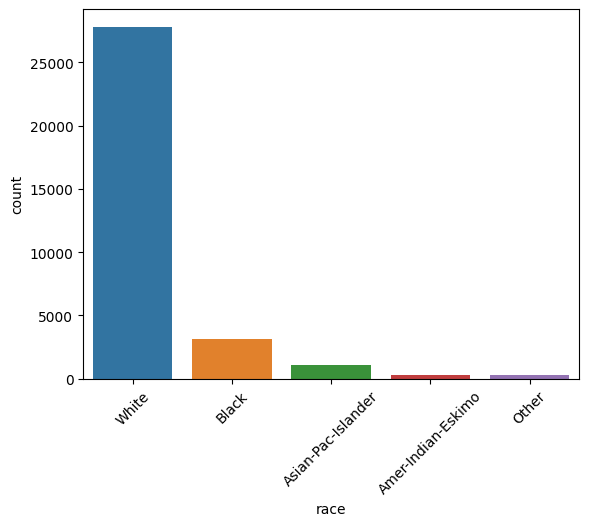

In [ ]:
# Cria um gráfico de barras da variável race
sns.countplot(x='race', data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
race_counts = df['race'].value_counts()
race_percentages = race_counts / race_counts.sum() * 100
race_stats = pd.concat([race_counts, race_percentages], axis=1, keys=['Quantidade', 'Porcentagem'])
print(race_stats)

                    Quantidade  Porcentagem
White                    27816    85.427352
Black                     3124     9.594300
Asian-Pac-Islander        1039     3.190934
Amer-Indian-Eskimo         311     0.955130
Other                      271     0.832284


**3. Apresente as métricas estatísticas (média, moda, etc.) e histograma das variáveis _age_ e _hours-per-week_.**

###Age

In [ ]:
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [ ]:
# Saber a moda da idade
df['age'].mode()

0    36
Name: age, dtype: int64

In [ ]:
# confirmando a moda do método acima
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

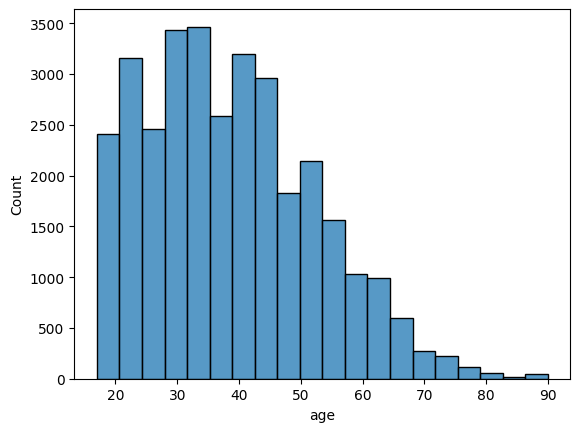

In [ ]:
sns.histplot(x='age', data=df, bins=20)
plt.show()

###hours-per-week

In [ ]:
df['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [ ]:
# Saber a moda da hours-per-week
df['hours-per-week'].mode()

0    40
Name: hours-per-week, dtype: int64

In [ ]:
# confirmando a moda do método acima
df['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

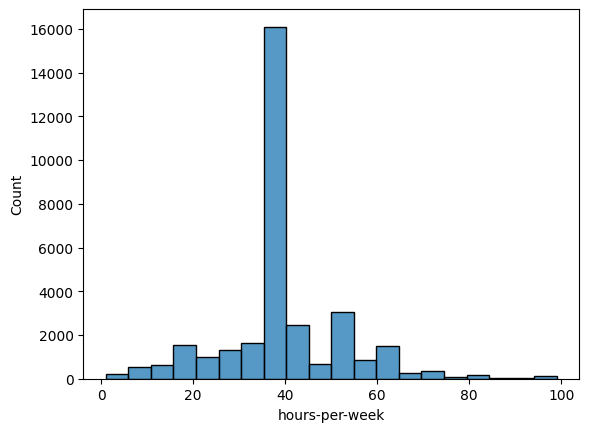

In [ ]:
sns.histplot(x='hours-per-week', data=df, bins=20)
plt.show()

**4. Apresente 2 análises multivaridas entre variáveis a sua escolha.**

###Análise 1: Relação entre o nível educacional e a média de horas trabalhadas por semana.

In [ ]:
education_hours = pd.pivot_table(df, values='hours-per-week', index='education', aggfunc='mean')
education_hours

,hours-per-week
education,
10th,37.052519
11th,33.925957
12th,35.780600
1st-4th,38.255952
5th-6th,38.897898
7th-8th,39.366873
9th,38.044747
Assoc-acdm,40.504217
Assoc-voc,41.610709


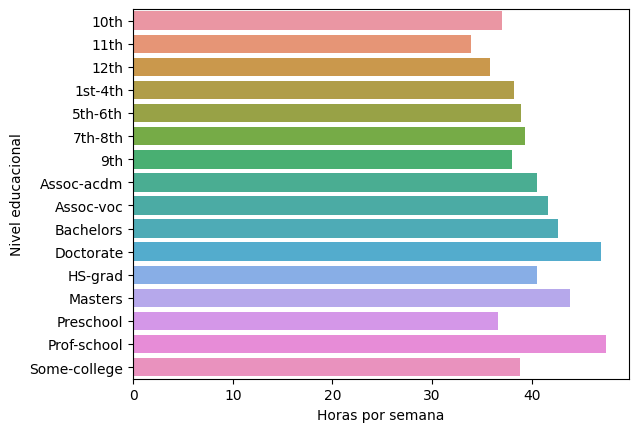

In [ ]:
# Representação gráfica da análise.
sns.barplot(x='hours-per-week', y=education_hours.index, data=education_hours)
plt.xlabel('Horas por semana')
plt.ylabel('Nivel educacional')
plt.show()

###Análise 2: Relação entre o estado civil e o ganho médio de capital

In [ ]:
marital_gain = df.pivot_table(values='capital-gain', index='marital-status', aggfunc='mean')
marital_gain

,capital-gain
marital-status,
Divorced,728.414810
Married-AF-spouse,432.652174
Married-civ-spouse,1764.859509
Married-spouse-absent,653.983254
Never-married,376.588318
Separated,535.568780
Widowed,571.071501


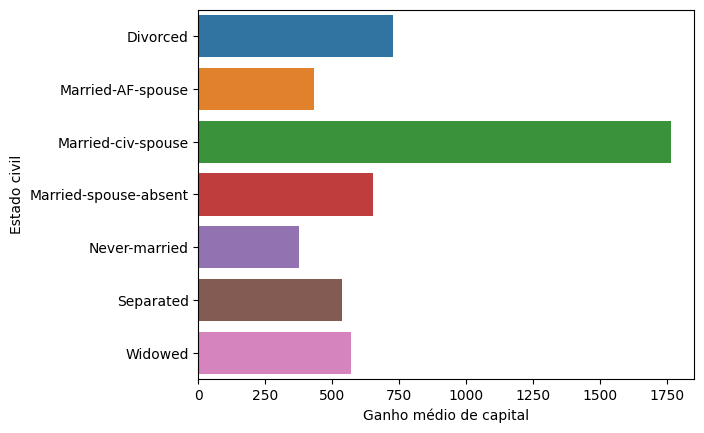

In [ ]:
# Representação gráfica da análise.
sns.barplot(x='capital-gain', y=marital_gain.index, data=marital_gain)
plt.xlabel('Ganho médio de capital')
plt.ylabel('Estado civil')
plt.show()

**5. Apresente a soma de _NaN_ de cada coluna da base de dados.**

In [ ]:
df.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
target               0
dtype: int64

**6. Trate os _NaN_ de todas as colunas como achar conveniente (explique). Em seguida, mostre que nenhuma coluna apresenta _NaN_ ao final do processo.**

In [ ]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [ ]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [ ]:
df['workclass'] = df['workclass'].fillna('Outros')
df['occupation'] = df['occupation'].fillna('Não-informado')
df['native-country'] = df['native-country'].fillna('Desconhecido')
# Para workclass substituir "NaN" por "outros", pois não sei se poderia existir algum outro tipo de classe de trabalho.
# Para occupation utilizei "Não inforamdo" pois já existia valores para outro-serviço("other-service").
# Para native-country utilizei "Desconhecido" por se tratar de uma identificação.

In [ ]:
df.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
target            0
dtype: int64

**7. Aplique _Ordinal Encoding_ em uma variável categórica ordinal.**

In [ ]:
df['education'].unique().tolist()

['Bachelors',
 'HS-grad',
 '11th',
 'Masters',
 '9th',
 'Some-college',
 'Assoc-acdm',
 'Assoc-voc',
 '7th-8th',
 'Doctorate',
 'Prof-school',
 '5th-6th',
 '10th',
 '1st-4th',
 'Preschool',
 '12th']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Definir a ordem das categorias
order = ['Bachelors',
 'HS-grad',
 '11th',
 'Masters',
 '9th',
 'Some-college',
 'Assoc-acdm',
 'Assoc-voc',
 '7th-8th',
 'Doctorate',
 'Prof-school',
 '5th-6th',
 '10th',
 '1st-4th',
 'Preschool',
 '12th']

# Cria o encoder ordinal e ajusta a coluna 'education'
encoder = OrdinalEncoder(categories=[order])
df['education'] = encoder.fit_transform(df[['education']])

#df.drop('education', axis=1, inplace=True)

In [ ]:
df.head(5)

,age,workclass,education,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,0.0,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,0.0,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,1.0,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,2.0,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,0.0,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K


**8. Aplique _One Hot Encoding_ em uma variável categórica nominal.**

In [ ]:
df['race'].unique().tolist()

['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Criando e aplicando o método one_hot_Encoder na coluna 'race'
encoder = OneHotEncoder(sparse_output=False)
race_encoded = encoder.fit_transform(df[['race']])

# Cria um DataFrame com as colunas one-hot e concatena o dataframe one-hot com dataframe original
race_encoded_df = pd.DataFrame(race_encoded, columns=encoder.get_feature_names_out(['race']))
df_encoded = pd.concat([df, race_encoded_df], axis=1)

# Remove a coluna original 'race'
df_encoded.drop('race', axis=1, inplace=True)

In [ ]:
df_encoded.sample(3)

,age,workclass,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,native-country,target,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
19157,27,Private,1.0,9,Married-civ-spouse,Farming-fishing,Male,0,0,40,United-States,<=50K,0.0,0.0,0.0,0.0,1.0
26545,32,Self-emp-inc,0.0,13,Married-civ-spouse,Other-service,Male,0,0,50,Iran,>50K,0.0,1.0,0.0,0.0,0.0
25573,58,Federal-gov,0.0,13,Never-married,Prof-specialty,Male,0,0,48,United-States,<=50K,0.0,0.0,0.0,0.0,1.0


**9. Aplique uma técnica de _oversampling_ (classe minoritária) e uma de _undersampling_ (classe majoritária). Apresente a mudança de volumetria (antes e depois). Se necessário, lembre-se de tratar as variáveis categóricas de forma adequada caso deseje usar um método mais robusto (SMOTE, por exemplo). Se for o caso, utilize PCA para visualizar os dados de forma bidimensional (antes e depois da amostragem).**

In [ ]:
df_encoded['target'].value_counts()

<=50K    24720
>50K      7841
Name: target, dtype: int64

### Tratando as variáveis

In [ ]:
# Tratando as variaveis
encoder = OneHotEncoder(sparse_output=False)
workclass_encoded = encoder.fit_transform(df[['workclass', 'marital-status', 'occupation', 'native-country', 'sex']])
workclass_encoded_df = pd.DataFrame(workclass_encoded, columns=encoder.get_feature_names_out(['workclass', 'marital-status', 'occupation', 'native-country', 'sex']))
df_workclass = pd.concat([df_encoded, workclass_encoded_df], axis=1)
df_workclass.drop(['workclass', 'marital-status', 'occupation', 'native-country', 'sex'], axis=1, inplace=True)

In [ ]:
df_workclass.sample(3)

,age,education,education-num,capital-gain,capital-loss,hours-per-week,target,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,sex_Female,sex_Male
11849,52,6.0,12,0,0,50,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1853,28,0.0,13,0,0,50,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
10587,33,5.0,10,0,0,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df_original = df.copy()
df_original.drop(['workclass', 'marital-status', 'occupation', 'native-country', 'sex', 'race', 'education'], axis=1, inplace=True)

In [ ]:
df_original.sample(3)

,age,education-num,capital-gain,capital-loss,hours-per-week,target
3794,26,10,3325,0,40,<=50K
20042,68,9,0,0,50,>50K
23789,48,9,0,1848,40,>50K


###Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

# Separa as variáveis independentes e a variável alvo
X_over = df_workclass.drop('target', axis=1)
y_over = df_workclass['target']

# Aplica o SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_over, y_over)

# Verifica o novo balanceamento da variável alvo
y_resampled.value_counts()

<=50K    24720
>50K     24720
Name: target, dtype: int64

###Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Separa as variáveis independentes e a variável alvo
X_under = df_workclass.drop('target', axis=1)
y_under = df_workclass['target']

# Aplica o Random Under Sampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_under, y_under)

# Verifica o novo balanceamento da variável alvo
y_resampled.value_counts()

<=50K    7841
>50K     7841
Name: target, dtype: int64

###PCA - ORIGINAL

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalização dos dados
scaler = MinMaxScaler()

scl_original = pd.DataFrame(scaler.fit_transform(df_original.drop('target', axis=1)), columns = df_original.drop('target', axis=1).columns)
scl_original.sample(3)

,age,education-num,capital-gain,capital-loss,hours-per-week
14967,0.027397,0.533333,0.0,0.000000,0.397959
17308,0.520548,1.000000,0.0,0.000000,0.295918
29676,0.479452,0.800000,0.0,0.402893,0.397959


In [ ]:
X_original = df.drop('target', axis=1)
y_original = df['target']

# aplicando o PCA com duas componentes
pca_original = PCA(n_components=2)
X_pca_original = pca_original.fit_transform(scl_original)

In [ ]:
# Converte a variável y_original para um array de cores
le = LabelEncoder()
y_colors_original = le.fit_transform(y_original)
#obs: estou utilizando esse método pois o y_original contém valores que não podem ser usados como cores no gráfico de dispersão

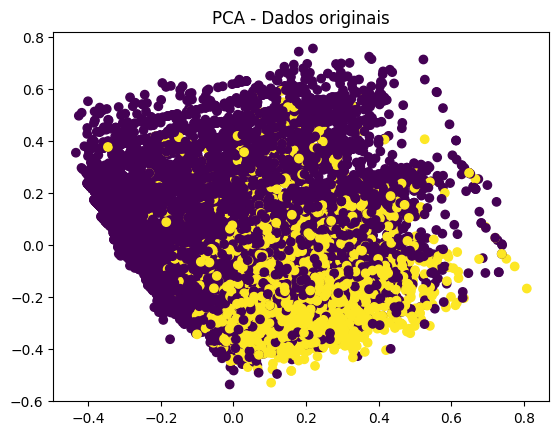

In [ ]:
# plotando os dados em duas dimensões
plt.scatter(X_pca_original[:,0], X_pca_original[:,1], c=y_colors_original) #array de cores é o parâmetro (c).
plt.title('PCA - Dados originais')
plt.show()

In [ ]:
X_pca_original

array([[ 0.05691216, -0.17908066],
       [ 0.16468684, -0.08259339],
       [-0.02912486,  0.06733865],
       ...,
       [ 0.23171892,  0.14799865],
       [-0.26342363,  0.04058773],
       [ 0.16104925,  0.11602468]])

###PCA - OVER

In [ ]:
# Normalização dos dados
scl_over = pd.DataFrame(scaler.fit_transform(df_workclass.drop('target', axis=1)), columns = df_workclass.drop('target', axis=1).columns)
scl_over.sample(3)

,age,education,education-num,capital-gain,capital-loss,hours-per-week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,sex_Female,sex_Male
12278,0.232877,0.066667,0.533333,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
15379,0.150685,0.066667,0.533333,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4292,0.438356,0.466667,0.666667,0.0,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# aplicando o PCA com dois componentes
pca_over = PCA(n_components=2)
X_pca_over = pca_over.fit_transform(scl_over)

In [ ]:
# Converte a variável y_over para um array de cores
y_colors_over = le.fit_transform(y_over)

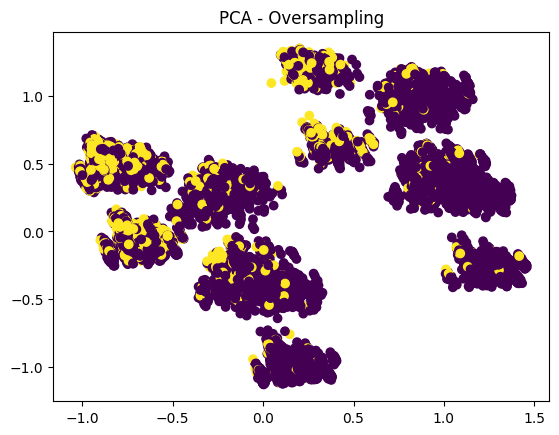

In [ ]:
# plotando os dados em duas dimensões
plt.scatter(X_pca_over[:,0], X_pca_over[:,1], c=y_colors_over)
plt.title('PCA - Oversampling')
plt.show()

In [ ]:
X_pca_over

array([[ 0.13209849, -0.37243708],
       [-0.92934901,  0.6037571 ],
       [-0.11752677, -0.27873871],
       ...,
       [ 0.95908023,  0.46829774],
       [ 0.240504  , -0.92163126],
       [ 0.14228566,  1.23356568]])

###PCA - UNDER

In [ ]:
# Normalização dos dados
scl_under = pd.DataFrame(scaler.fit_transform(df_workclass.drop('target', axis=1)), columns = df_workclass.drop('target', axis=1).columns)
scl_under.sample(3)

,age,education,education-num,capital-gain,capital-loss,hours-per-week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,sex_Female,sex_Male
28529,0.027397,0.066667,0.533333,0.0,0.0,0.346939,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9160,0.260274,0.066667,0.533333,0.0,0.0,0.704082,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17590,0.342466,0.066667,0.533333,0.0,0.0,0.448980,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# aplicando o PCA com dois componentes
pca_under = PCA(n_components=2)
X_pca_under = pca_under.fit_transform(scl_under)

In [ ]:
# Converte a variável y_under para um array de cores
y_colors_under = le.fit_transform(y_under)

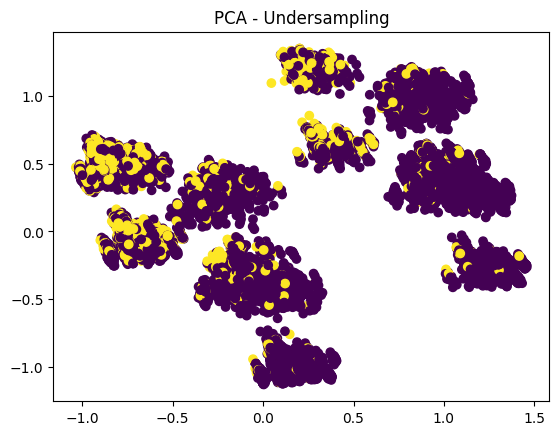

In [ ]:
# plotando os dados em duas dimensões
plt.scatter(X_pca_under[:,0], X_pca_under[:,1], c=y_colors_under)
plt.title('PCA - Undersampling')
plt.show()

In [ ]:
X_pca_under

array([[ 0.13209892, -0.37238887],
       [-0.92934914,  0.60372274],
       [-0.11752686, -0.27874747],
       ...,
       [ 0.95908047,  0.46832111],
       [ 0.24050416, -0.92162143],
       [ 0.14228573,  1.23358112]])

**10. Aplique _One Hot Encoding_ nas variáveis _race_ e _sex_. Junte ao resultado _TODAS_ as outras variáveis númericas (_age_, _education-num_, _capital-gain_, _capital-loss_ e _hours-per-week_). Utilize o dataset resultante no algoritmo t-SNE e reduza a dimensionalidade à 2 componentes (padrão do algoritmo). Plote o resultado diferenciando os pontos pela classe (atributo _target_).**

###OneHotEncoding race e sex

In [ ]:
race_encoded = encoder.fit_transform(df[['race', 'sex']])
race_encoded_df = pd.DataFrame(race_encoded, columns=encoder.get_feature_names_out(['race', 'sex']))
df_final = pd.concat([df, race_encoded_df], axis=1)
df_final.drop(['race', 'sex','workclass', 'marital-status', 'occupation', 'native-country', 'education'], axis=1, inplace=True)

In [ ]:
df_final.sample(3)

,age,education-num,capital-gain,capital-loss,hours-per-week,target,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
975,25,10,0,0,40,<=50K,0.0,0.0,0.0,0.0,1.0,1.0,0.0
22265,42,16,0,0,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19796,53,9,0,0,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,1.0


###t-SNE

In [ ]:
# Normalização dos dados
scl_tnse = pd.DataFrame(scaler.fit_transform(df_final.drop('target', axis=1)), columns = df_final.drop('target', axis=1).columns)
scl_tnse.sample(3)

,age,education-num,capital-gain,capital-loss,hours-per-week,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
27753,0.164384,0.800000,0.03103,0.0,0.448980,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23401,0.123288,0.533333,0.00000,0.0,0.193878,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8116,0.328767,0.800000,0.00000,0.0,0.346939,0.0,0.0,0.0,0.0,1.0,0.0,1.0


<ipython-input-182-fc533288a201>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:,0], X_tsne[:,1], c=color_array, cmap='coolwarm')


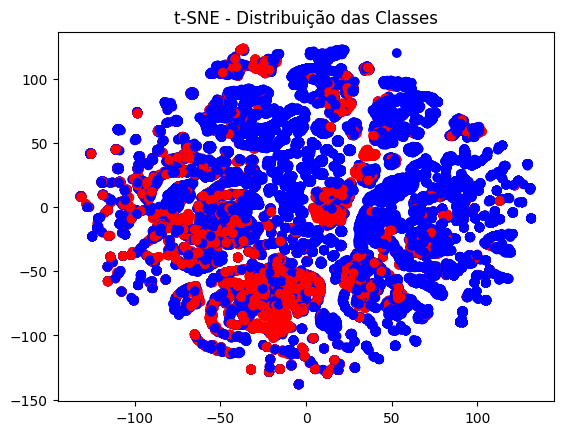

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

# Aplicando o algoritmo t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scl_tnse)

# Diferenciando os pontos pela classe (atributo target).
colors = {'<=50K': 'blue', '>50K': 'red'}

# Converte a variável target para um array de cores
color_array = np.array(df['target'].map(colors))

# Plotando o resultado
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=color_array, cmap='coolwarm')
plt.title('t-SNE - Distribuição das Classes')
plt.show()